## Лабортаорная работа №1


In [309]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

В этом проекте используется набор данных о сердечной недостаточности с клиническими записями.
Поля:

1. Возраст, пол

2. Анемия, диабет, гипертония, курение - 0/1 (True/False)

3. Креатинфосфокиназа (уровень фермента КФК, мкг/л)
4. Фракция выброса (процент крови, выкачиваемой из сердца за одно сокращение, %)
5. Тромбоциты (количество тромбоцитов в крови, кило/мкл)
6. Креатинин сыворотки (уровень креатинина в крови, мг/дл)
7. Натрий сыворотки (уровень натрия в крови, мэкв/л)

8. Время наблюдения

9. Смертельный исход - 0/1 (True/False)


##### 1. Загружаем датасет


In [310]:
df_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv"
df = pd.read_csv(df_url)
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


##### 2. Проанализируем данные


In [311]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [312]:
df_size = df.shape
print(f"В датасете {df_size[0]} записей (строк) и {df_size[1]} колонок (полей)")

В датасете 299 записей (строк) и 13 колонок (полей)


##### 3. Выберем колонки для анализа


In [ ]:
picked_columns = ['creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']

ru_columns_title = {
    'creatinine_phosphokinase' : 'Креатинфосфокиназа',
    'ejection_fraction' : 'Фракция выброса',
    'platelets' : 'Тромбоциты',
    'serum_creatinine' : 'Креатинин сыворотки',
    'serum_sodium' : 'Натрий сыворотки'
}

picked_columns

['creatinine_phosphokinase',
 'ejection_fraction',
 'platelets',
 'serum_creatinine',
 'serum_sodium']

## Основные методы обнаружения и обработки выбросов


### IQR (Interquartile Range)


- Q1 (Первый квартиль) - значение, ниже которого находится 25% данных
- Q2 (Медиана) - значение, которое делит данные пополам (50%)
- Q3 (Третий квартиль) - значение, ниже которого находится 75% данных

$$IQR = Q3 - Q1$$

\begin{gathered}
\text{Верхняя граница} = Q3 + 1.5 \times IQR \\
\text{Нижняя граница} = Q1 - 1.5 \times IQR
\end{gathered}


##### 1. Анализируем поля на выбросы


In [314]:
def iqr_method(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)] # Выбросы
    return outliers, lower_bound, upper_bound, Q1, Q3, IQR

def iqr_method_decoration(df, columns):
    outliers_summary = {}
    num_emissions_outliers = 5
    
    for col in columns:
        outliers, lower, upper, Q1, Q3, IQR = iqr_method(df, col)
        
        outliers_summary[col] = {
            'outliers': outliers,
            'count': len(outliers),
            'percentage': (len(outliers) / len(df)) * 100,
            'bounds': (lower, upper),
            'Q1': Q1,
            'Q3': Q3,
            'IQR': IQR
        }
        
        print(f"\nFeature - {col}:")
        print(f"Q1 (25%): {Q1:.2f}")
        print(f"Q3 (75%): {Q3:.2f}")
        print(f"IQR: {IQR:.2f}")
        print(f"Верхняя граница: {upper:.2f}")
        print(f"Нижняя граница: {lower:.2f}")
        print(f"Выбросов: {len(outliers)} ({outliers_summary[col]['percentage']:.1f}%)")
        print(f"Значения первых {min(num_emissions_outliers, len(outliers))} выбросов: {outliers[col].values[:num_emissions_outliers]}")
    
    return outliers_summary

In [315]:
iqr_results = iqr_method_decoration(df, picked_columns)


Feature - creatinine_phosphokinase:
Q1 (25%): 116.50
Q3 (75%): 582.00
IQR: 465.50
Верхняя граница: 1280.25
Нижняя граница: -581.75
Выбросов: 29 (9.7%)
Значения первых 5 выбросов: [7861 2656 1380 3964 7702]

Feature - ejection_fraction:
Q1 (25%): 30.00
Q3 (75%): 45.00
IQR: 15.00
Верхняя граница: 67.50
Нижняя граница: 7.50
Выбросов: 2 (0.7%)
Значения первых 2 выбросов: [80 70]

Feature - platelets:
Q1 (25%): 212500.00
Q3 (75%): 303500.00
IQR: 91000.00
Верхняя граница: 440000.00
Нижняя граница: 76000.00
Выбросов: 21 (7.0%)
Значения первых 5 выбросов: [454000.  47000. 451000. 461000. 497000.]

Feature - serum_creatinine:
Q1 (25%): 0.90
Q3 (75%): 1.40
IQR: 0.50
Верхняя граница: 2.15
Нижняя граница: 0.15
Выбросов: 29 (9.7%)
Значения первых 5 выбросов: [2.7 9.4 4.  5.8 3. ]

Feature - serum_sodium:
Q1 (25%): 134.00
Q3 (75%): 140.00
IQR: 6.00
Верхняя граница: 149.00
Нижняя граница: 125.00
Выбросов: 4 (1.3%)
Значения первых 4 выбросов: [116 121 124 113]


##### 2. Визуализируем отчистку данных от выбросов (Ящик с усами):


In [ ]:
def visualize_outliers_before(df, columns):
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.ravel()
    
    plt.suptitle('До отчистки', fontsize=14, fontweight='bold')
    
    for i, column in enumerate(columns):
        if i < len(axes):
            ax = axes[i]
            data = df[column].dropna()
            
            box_plot = ax.boxplot(data, patch_artist=True, widths=0.6,
                                 showmeans=True, meanline=True, showfliers=True)
            
            # Ящик
            for box in box_plot['boxes']:
                box.set(facecolor='lightblue', alpha=0.7)
            
            # Медиана
            for median in box_plot['medians']:
                median.set(color='red', linewidth=2)
            
            # Среднее
            for mean in box_plot['means']:
                mean.set(color='green', linewidth=2, linestyle='--')

            ax.set_title(ru_columns_title[column])
            ax.grid(True, alpha=0.3)
            
            # Статистика для заголовка
            Q1 = data.quantile(0.25)
            Q3 = data.quantile(0.75)
            IQR = Q3 - Q1
            outliers = data[(data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))]
            
            ax.text(0.02, 0.98, f'Выбросов: {len(outliers)}', 
                   transform=ax.transAxes, verticalalignment='top',
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    for i in range(len(columns), len(axes)):
        fig.delaxes(axes[i])
    
    # Легенда
    from matplotlib.lines import Line2D
    legend_elements = [
        Line2D([0], [0], color='red', linewidth=2, label='Медиана'),
        Line2D([0], [0], color='green', linewidth=2, linestyle='--', label='Среднее'),
        Line2D([0], [0], marker='o', color='white', markeredgecolor='black', linestyle='None', markersize=6, label='Выбросы')
    ]
    
    fig.legend(handles=legend_elements, loc='lower center', ncol=3)
    plt.tight_layout()
    plt.subplots_adjust(top=0.92, bottom=0.08)
    plt.show()

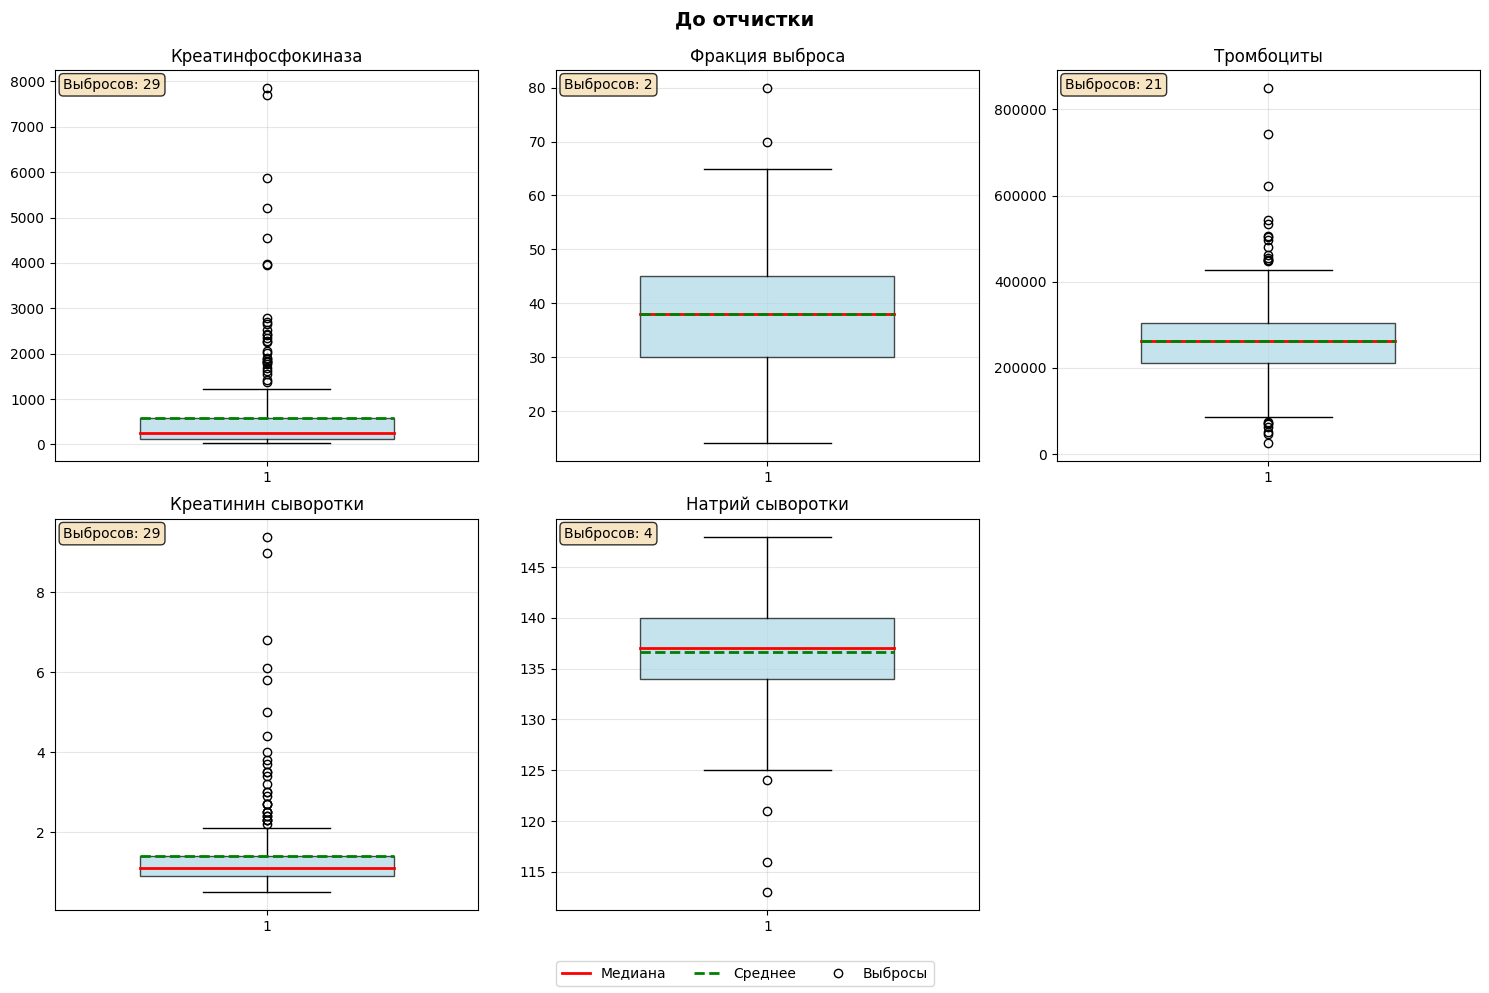

In [317]:
visualize_outliers_before(df, picked_columns)

##### 3. Чистим данные


In [318]:
def remove_outliers_iqr(df, columns):
    clean_df = df.copy()
    
    for col in columns:
        Q1 = clean_df[col].quantile(0.25)
        Q3 = clean_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        mask = (clean_df[col] >= lower_bound) & (clean_df[col] <= upper_bound)
        clean_df = clean_df[mask]
    
    return clean_df

df_clean = remove_outliers_iqr(df, picked_columns)

print(f"Исходный размер: {len(df)} записей")
print(f"Финальный размер: {len(df_clean)} записей")
print(f"Всего удалено: {len(df) - len(df_clean)} записей ({(len(df_clean) / len(df))*100:.1f}% данных)")

Исходный размер: 299 записей
Финальный размер: 224 записей
Всего удалено: 75 записей (74.9% данных)


##### 4. Сравниваем данные ДО и ПОСЛЕ удавления выбросов


creatinine_phosphokinase  970.29          279.52          -71.2          %
ejection_fraction         11.83           11.71           -1.0           %
platelets                 97804.24        67153.75        -31.3          %
serum_creatinine          1.03            0.33            -68.3          %
serum_sodium              4.41            3.81            -13.7          %


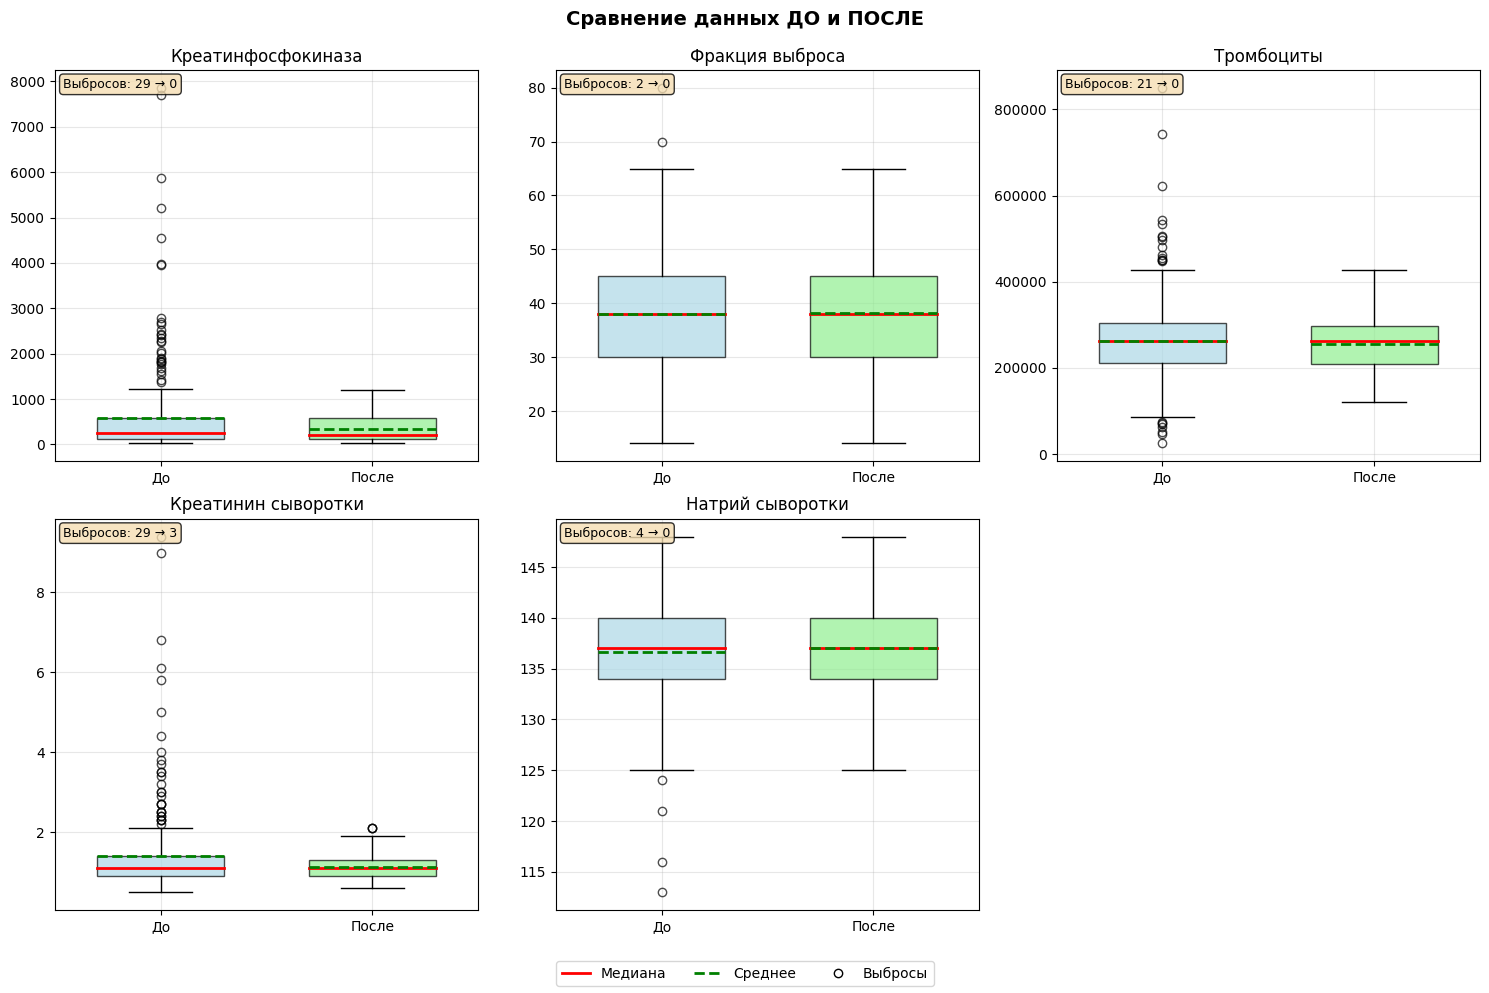

In [319]:
def compare_iqr_before_after(df_original, df_clean):
    for col in picked_columns:
        orig_std = df_original[col].std()
        clean_std = df_clean[col].std()
        change = ((clean_std - orig_std) / orig_std) * 100
        
        print(f"{col:<25} {orig_std:<15.2f} {clean_std:<15.2f} {change:<15.1f}%")
    
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.ravel()
    
    plt.suptitle('Сравнение данных ДО и ПОСЛЕ', fontsize=14, fontweight='bold')
    
    for i, col in enumerate(picked_columns):
        if i < len(axes):
            ax = axes[i]
            data_before = df_original[col].dropna()
            data_after = df_clean[col].dropna()
            
            box_plot = ax.boxplot([data_before, data_after], 
                                 patch_artist=True, widths=0.6,
                                 showmeans=True, meanline=True, showfliers=True,
                                 labels=['До', 'После'])
            
            colors = ['lightblue', 'lightgreen']
            for patch, color in zip(box_plot['boxes'], colors):
                patch.set(facecolor=color, alpha=0.7)
            
            for median in box_plot['medians']:
                median.set(color='red', linewidth=2)
            
            for mean in box_plot['means']:
                mean.set(color='green', linewidth=2, linestyle='--')
            
            for flier in box_plot['fliers']:
                flier.set(marker='o', color='red', alpha=0.7, markersize=6)
            
            ax.set_title(ru_columns_title[col])
            ax.grid(True, alpha=0.3)
            
            outliers_before, _, _, _, _, _ = iqr_method(df, col)
            outliers_after, _, _, _, _, _ = iqr_method(df_clean, col)
            
            ax.text(0.02, 0.98, f'Выбросов: {len(outliers_before)} → {len(outliers_after)}', 
                   transform=ax.transAxes, verticalalignment='top', fontsize=9,
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    

    for i in range(len(picked_columns), len(axes)):
        fig.delaxes(axes[i])
    
    from matplotlib.lines import Line2D
    legend_elements = [
        Line2D([0], [0], color='red', linewidth=2, label='Медиана'),
        Line2D([0], [0], color='green', linewidth=2, linestyle='--', label='Среднее'),
        Line2D([0], [0], marker='o', markerfacecolor='white', markeredgecolor='black',
               linestyle='None', markersize=6, label='Выбросы')
    ]
    
    fig.legend(handles=legend_elements, loc='lower center', ncol=3)
    plt.tight_layout()
    plt.subplots_adjust(top=0.92, bottom=0.08)
    plt.show()

compare_iqr_before_after(df, remove_outliers_iqr(df, picked_columns))

##### 5. Вывод


Как можно заметить на 4-том графике, метод IQR, опирающийся на квартили, требует итерационного подхода. После чистки данных и пересчёта границ были выявлены новые выбросы.


### Z-score метод


Показывает, насколько далеко значение отстоит от среднего в единицах стандартного отклонения.

$$
Z = \frac{(X-\mu)}{\sigma}
$$

где

$$
X - \text{значение признака} \\
\mu - \text{среднее значение признака} \\
\sigma - \text{стандартное отклонение признака}
$$

$|Z|>2$ - умеренные выбросы (95% данных в пределах)

$|Z|>3$ - сильные выбросы (99.7% данных в пределах)


##### 1. Анализ на выбросы


In [320]:
def zscore_method(df, column, threshold=3):
    data = df[column].dropna()
    
    z_scores = np.abs(stats.zscore(data))
    mean = data.mean()
    std = data.std()
    
    outlier_indices = np.where(z_scores > threshold)[0]
    outliers = df.loc[data.index[outlier_indices]]
    
    return outliers, z_scores, mean, std

def zscore_method_decoration(df, columns, threshold=3):
    outliers_summary = {}
    num_emissions_outliers = 5
    
    for col in columns:
        outliers, z_scores, mean, std = zscore_method(df, col, threshold)
        
        outliers_summary[col] = {
            'outliers': outliers,
            'count': len(outliers),
            'percentage': (len(outliers) / len(df)) * 100,
            'mean': mean,
            'std': std,
            'max_z_score': np.max(z_scores) if len(z_scores) > 0 else 0
        }
        
        print(f"Среднее: {mean:.2f}")
        print(f"Стандартное отклонение: {std:.2f}")
        print(f"Максимальный Z-score: {outliers_summary[col]['max_z_score']:.2f}")
        print(f"Выбросов: {len(outliers)} ({outliers_summary[col]['percentage']:.1f}%)")
        
        if len(outliers) > 0:
            print(f"Значения первых {min(num_emissions_outliers, len(outliers))} выбросов: {outliers[col].values[:num_emissions_outliers]}\n")
    
    return outliers_summary

In [321]:
zscore_result = zscore_results = zscore_method_decoration(df, picked_columns)

Среднее: 581.84
Стандартное отклонение: 970.29
Максимальный Z-score: 7.51
Выбросов: 7 (2.3%)
Значения первых 5 выбросов: [7861 3964 7702 5882 5209]

Среднее: 38.08
Стандартное отклонение: 11.83
Максимальный Z-score: 3.55
Выбросов: 1 (0.3%)
Значения первых 1 выбросов: [80]

Среднее: 263358.03
Стандартное отклонение: 97804.24
Максимальный Z-score: 6.01
Выбросов: 3 (1.0%)
Значения первых 3 выбросов: [621000. 850000. 742000.]

Среднее: 1.39
Стандартное отклонение: 1.03
Максимальный Z-score: 7.75
Выбросов: 6 (2.0%)
Значения первых 5 выбросов: [9.4 5.8 6.8 6.1 9. ]

Среднее: 136.63
Стандартное отклонение: 4.41
Максимальный Z-score: 5.36
Выбросов: 3 (1.0%)
Значения первых 3 выбросов: [116 121 113]



##### 2. Визуализация


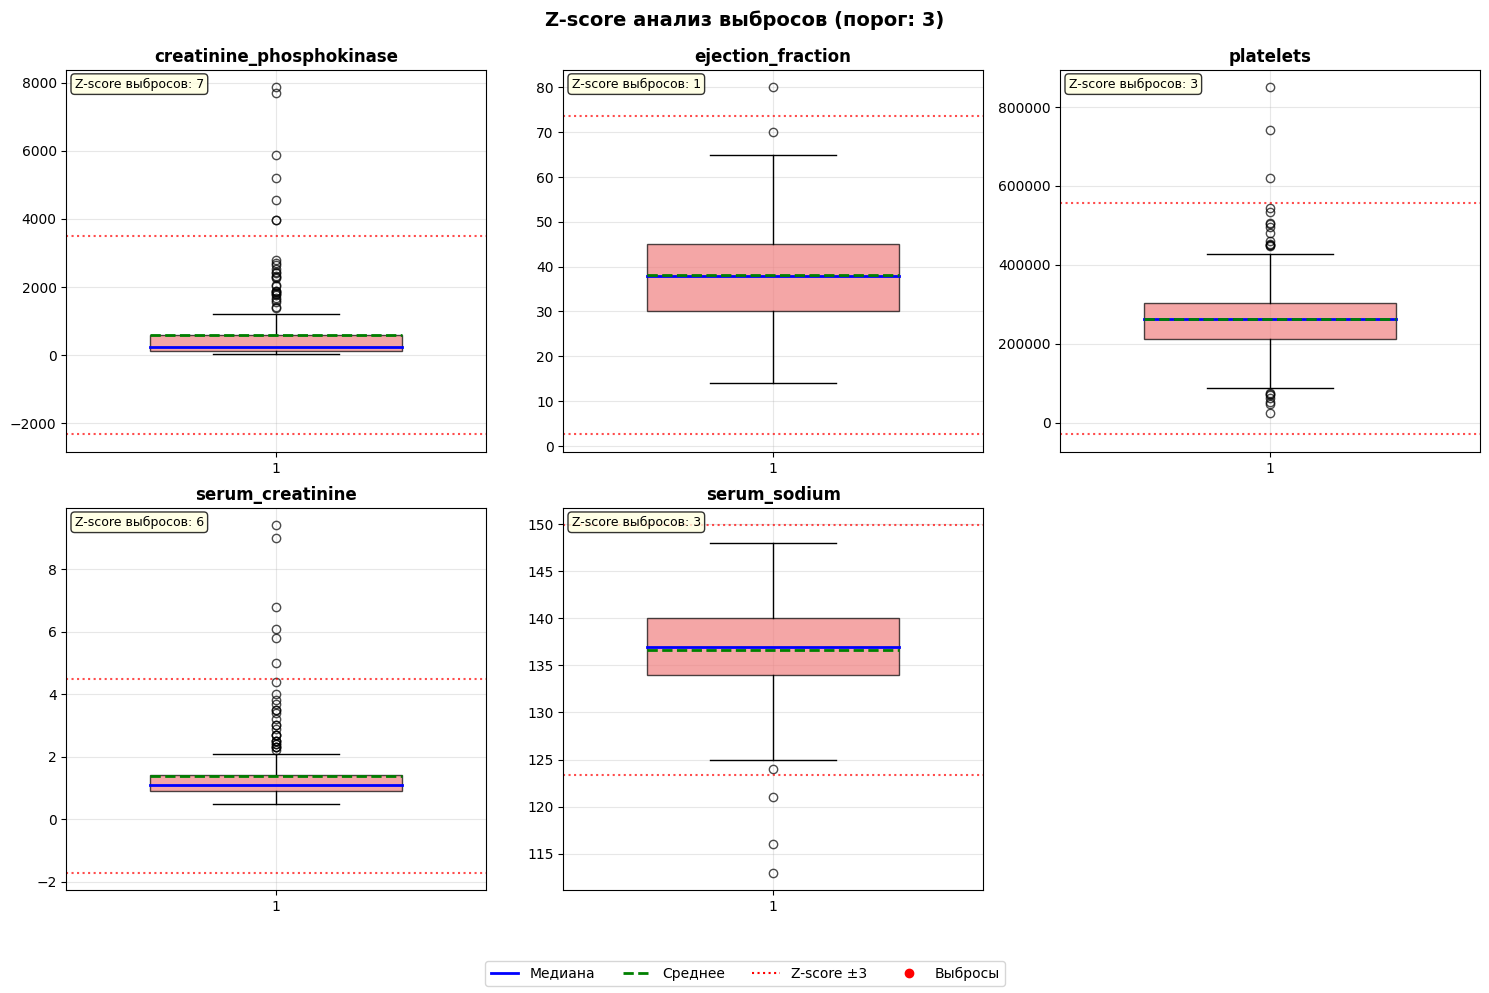

In [331]:
def visualize_zscore_before(df, columns, threshold=3):
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.ravel()
    
    plt.suptitle(f'Z-score анализ выбросов (порог: {threshold})', fontsize=14, fontweight='bold')
    
    for i, column in enumerate(columns):
        if i < len(axes):
            ax = axes[i]
            data = df[column].dropna()
            
            box_plot = ax.boxplot(data, patch_artist=True, widths=0.6,
                                 showmeans=True, meanline=True, showfliers=True)
            
            for box in box_plot['boxes']:
                box.set(facecolor='lightcoral', alpha=0.7)
            
            for median in box_plot['medians']:
                median.set(color='blue', linewidth=2)
            
            for mean in box_plot['means']:
                mean.set(color='green', linewidth=2, linestyle='--')
            
            for flier in box_plot['fliers']:
                flier.set(marker='o', color='red', alpha=0.7, markersize=6)
            
            ax.set_title(column, fontweight='bold')
            ax.grid(True, alpha=0.3)
            
            outliers, z_scores, mean, std = zscore_method(df, column, threshold)
            
            ax.text(0.02, 0.98, f'Z-score выбросов: {len(outliers)}', 
                   transform=ax.transAxes, verticalalignment='top', fontsize=9,
                   bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))
            
            if len(data) > 0:
                upper_bound = mean + threshold * std
                lower_bound = mean - threshold * std
                ax.axhline(y=upper_bound, color='red', linestyle=':', alpha=0.7, label=f'Z={threshold}')
                ax.axhline(y=lower_bound, color='red', linestyle=':', alpha=0.7)
    
    for i in range(len(columns), len(axes)):
        fig.delaxes(axes[i])
    
    legend_elements = [
        plt.Line2D([0], [0], color='blue', linewidth=2, label='Медиана'),
        plt.Line2D([0], [0], color='green', linewidth=2, linestyle='--', label='Среднее'),
        plt.Line2D([0], [0], color='red', linestyle=':', label=f'Z-score ±{threshold}'),
        plt.Line2D([0], [0], marker='o', color='red', linestyle='None', markersize=6, label='Выбросы')
    ]
    
    fig.legend(handles=legend_elements, loc='lower center', ncol=4)
    plt.tight_layout()
    plt.subplots_adjust(top=0.92, bottom=0.10)
    plt.show()

visualize_zscore_before(df, picked_columns)

##### 3. Чиста данных от выбросов


In [345]:
def remove_outliers_zscore(df, columns, threshold=3):
    clean_df = df.copy()
    original_size = len(clean_df)
    
    for col in columns:
        before = len(clean_df)
        
        non_na_mask = clean_df[col].notna()
        clean_data = clean_df.loc[non_na_mask, col]
        
        if len(clean_data) > 0:
            z_scores = np.abs(stats.zscore(clean_data))
            keep_mask = z_scores <= threshold
            
            clean_df = clean_df.loc[~non_na_mask | (non_na_mask & keep_mask)]
        
        after = len(clean_df)
        print(f"{col}: удалено {before - after} записей")
    
    total_removed = original_size - len(clean_df)
    print(f"\nИсходный размер: {original_size} записей")
    print(f"Финальный размер: {len(clean_df)} записей")
    print(f"Всего удалено: {total_removed} записей ({(total_removed/original_size)*100:.1f}% данных)")
    
    return clean_df

##### 4. Сравнение ДО и ПОСЛЕ удаления выбросов


creatinine_phosphokinase: удалено 7 записей
ejection_fraction: удалено 1 записей
platelets: удалено 3 записей
serum_creatinine: удалено 6 записей
serum_sodium: удалено 3 записей

Исходный размер: 299 записей
Финальный размер: 279 записей
Всего удалено: 20 записей (6.7% данных)


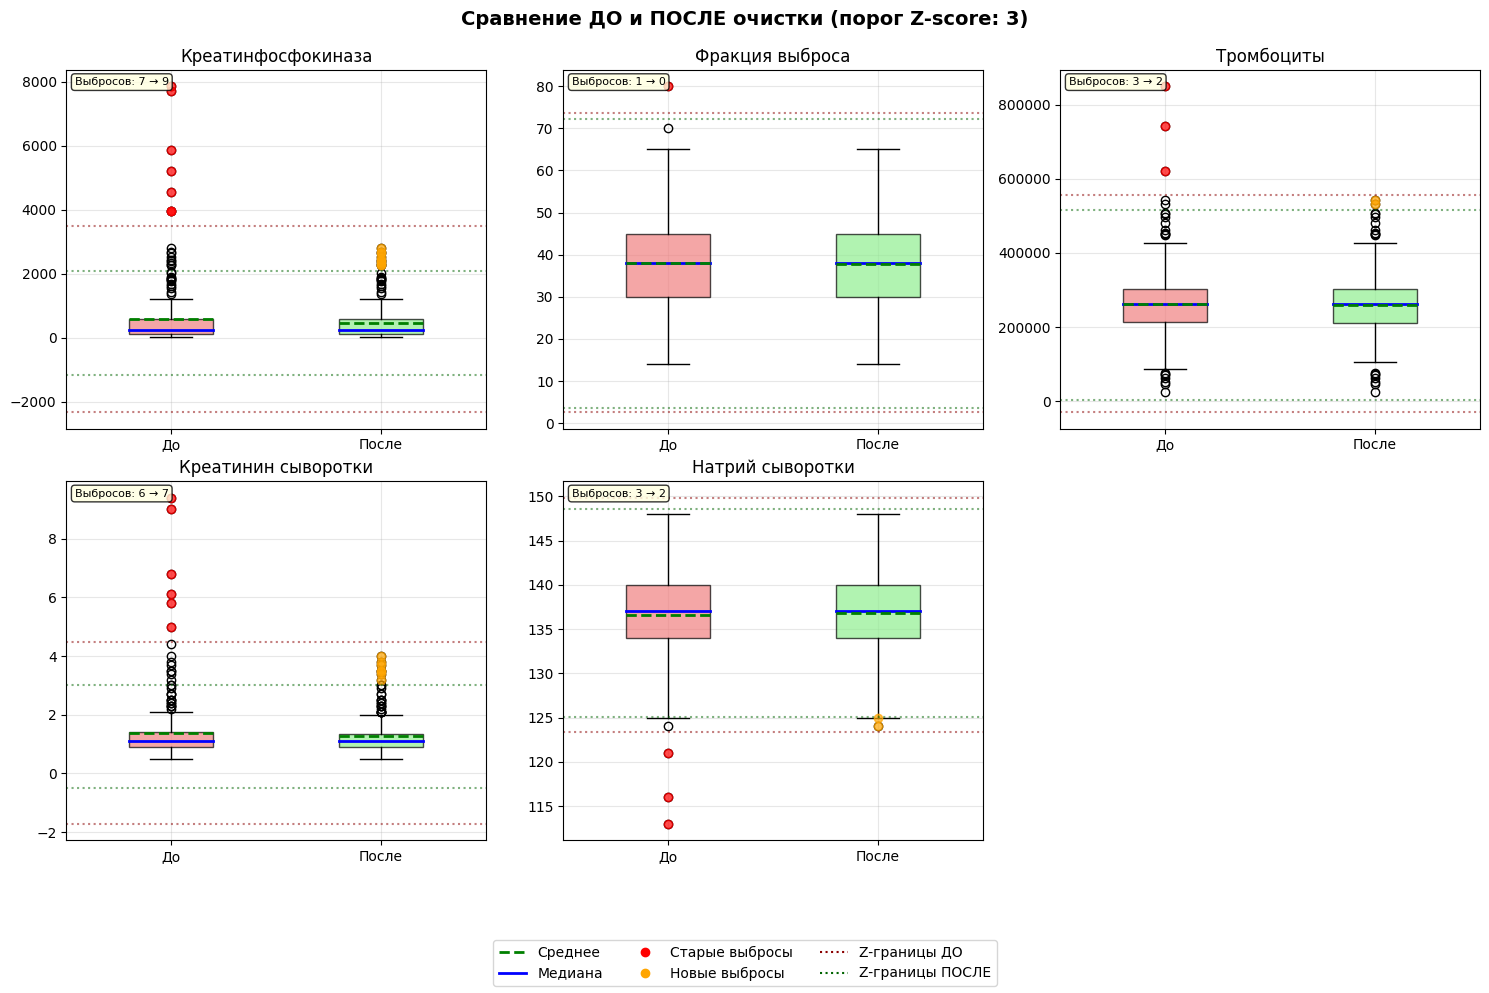

In [348]:
def compare_zscore_before_after(df_original, df_clean, columns, threshold=3):    
    total_outliers_before = 0
    total_outliers_after = 0
    
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.ravel()
    
    plt.suptitle(f'Сравнение ДО и ПОСЛЕ очистки (порог Z-score: {threshold})', 
                 fontsize=14, fontweight='bold')
    
    for i, col in enumerate(columns):
        if i < len(axes):
            ax = axes[i]
            data_before = df_original[col].dropna()
            data_after = df_clean[col].dropna()
            
            # Создаем ящики
            box_plot_before = ax.boxplot(data_before, positions=[1], widths=0.4,
                                       patch_artist=True, showmeans=True, meanline=True)
            box_plot_after = ax.boxplot(data_after, positions=[2], widths=0.4,
                                      patch_artist=True, showmeans=True, meanline=True)
            
            # Настройка цветов ящиков
            for box in box_plot_before['boxes']:
                box.set(facecolor='lightcoral', alpha=0.7)
            for box in box_plot_after['boxes']:
                box.set(facecolor='lightgreen', alpha=0.7)
            
            # Настройка медиан и средних
            for median in box_plot_before['medians'] + box_plot_after['medians']:
                median.set(color='blue', linewidth=2)
            for mean in box_plot_before['means'] + box_plot_after['means']:
                mean.set(color='green', linewidth=2, linestyle='--')
            
            # Определяем новые выбросы
            outliers_before, _, _, _ = zscore_method(df_original, col, threshold)
            outliers_after, _, _, _ = zscore_method(df_clean, col, threshold)
            
            # Находим значения которые стали выбросами после очистки
            before_values = set(outliers_before[col].values)
            after_values = set(outliers_after[col].values)
            new_outliers = after_values - before_values
            
            # Рисуем выбросы разными цветами
            for _, value in enumerate(data_after):
                if value in new_outliers:
                    # Новые выбросы - оранжевые
                    ax.plot(2, value, 'o', color='orange', markersize=6, alpha=0.7)
                elif value in after_values:
                    # Старые выбросы которые остались - красные
                    ax.plot(2, value, 'o', color='red', markersize=6, alpha=0.7)
            
            # Также рисуем выбросы для "До"
            for value in data_before:
                if value in before_values:
                    ax.plot(1, value, 'o', color='red', markersize=6, alpha=0.7)
            
            ax.set_title(ru_columns_title[col])
            ax.set_xticks([1, 2])
            ax.set_xticklabels(['До', 'После'])
            ax.grid(True, alpha=0.3)
            
            # Добавляем Z-score границы
            _, _, mean_before, std_before = zscore_method(df_original, col, threshold)
            _, _, mean_after, std_after = zscore_method(df_clean, col, threshold)
            
            upper_bound_before = mean_before + threshold * std_before
            lower_bound_before = mean_before - threshold * std_before
            ax.axhline(y=upper_bound_before, color='darkred', linestyle=':', alpha=0.5)
            ax.axhline(y=lower_bound_before, color='darkred', linestyle=':', alpha=0.5)
            
            upper_bound_after = mean_after + threshold * std_after
            lower_bound_after = mean_after - threshold * std_after
            ax.axhline(y=upper_bound_after, color='darkgreen', linestyle=':', alpha=0.5)
            ax.axhline(y=lower_bound_after, color='darkgreen', linestyle=':', alpha=0.5)
            
            ax.text(0.02, 0.98, f'Выбросов: {len(outliers_before)} → {len(outliers_after)}', 
                   transform=ax.transAxes, verticalalignment='top', fontsize=8,
                   bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))
            
            total_outliers_before += len(outliers_before)
            total_outliers_after += len(outliers_after)
    
    for i in range(len(columns), len(axes)):
        fig.delaxes(axes[i])
    
    legend_elements = [
        plt.Line2D([0], [0], color='green', linewidth=2, linestyle='--', label='Среднее'),
        plt.Line2D([0], [0], color='blue', linewidth=2, label='Медиана'),
        plt.Line2D([0], [0], marker='o', color='red', linestyle='None', markersize=6, label='Старые выбросы'),
        plt.Line2D([0], [0], marker='o', color='orange', linestyle='None', markersize=6, label='Новые выбросы'),
        plt.Line2D([0], [0], color='darkred', linestyle=':', label='Z-границы ДО'),
        plt.Line2D([0], [0], color='darkgreen', linestyle=':', label='Z-границы ПОСЛЕ')
    ]
    
    fig.legend(handles=legend_elements, loc='lower center', ncol=3)
    plt.tight_layout()
    plt.subplots_adjust(top=0.92, bottom=0.15)
    plt.show()

df_clean = remove_outliers_zscore(df, picked_columns)
# for i in range(5):
#     df_clean = remove_outliers_zscore(df_clean, picked_columns)
    
compare_zscore_before_after(df, df_clean, picked_columns)

##### 5. Вывод


Как и в IQR-методе после первой интерации чистки появились новые выбросы из-за перерасчёта границ. Но, если мы допишем пару строк кода и сделаем чистку несколько раз (интеративно),
мы получим более чистые данные, но с большими потерями.


creatinine_phosphokinase: удалено 7 записей
ejection_fraction: удалено 1 записей
platelets: удалено 3 записей
serum_creatinine: удалено 6 записей
serum_sodium: удалено 3 записей

Исходный размер: 299 записей
Финальный размер: 279 записей
Всего удалено: 20 записей (6.7% данных)
creatinine_phosphokinase: удалено 9 записей
ejection_fraction: удалено 0 записей
platelets: удалено 2 записей
serum_creatinine: удалено 7 записей
serum_sodium: удалено 2 записей

Исходный размер: 279 записей
Финальный размер: 259 записей
Всего удалено: 20 записей (7.2% данных)
creatinine_phosphokinase: удалено 9 записей
ejection_fraction: удалено 0 записей
platelets: удалено 1 записей
serum_creatinine: удалено 5 записей
serum_sodium: удалено 0 записей

Исходный размер: 259 записей
Финальный размер: 244 записей
Всего удалено: 15 записей (5.8% данных)
creatinine_phosphokinase: удалено 3 записей
ejection_fraction: удалено 0 записей
platelets: удалено 1 записей
serum_creatinine: удалено 5 записей
serum_sodium: удален

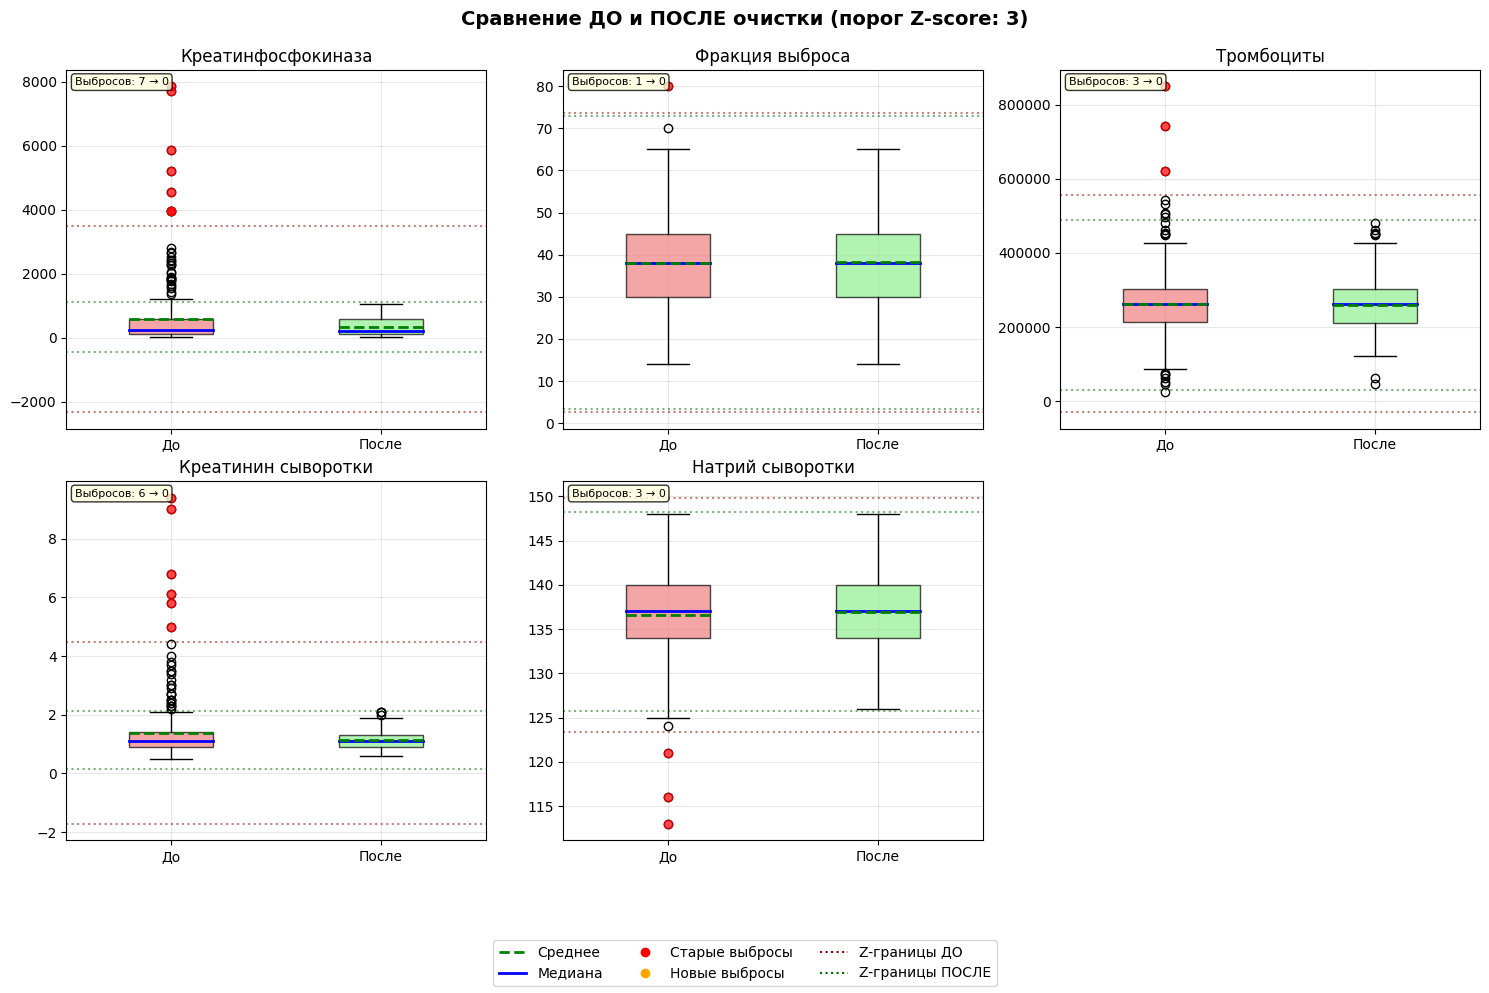

In [349]:
df_clean = remove_outliers_zscore(df, picked_columns)
for i in range(5):
    df_clean = remove_outliers_zscore(df_clean, picked_columns)
    
compare_zscore_before_after(df, df_clean, picked_columns)

#### Метод перцентилей


#### Метод MAD (Median Absolute Deviation)
